This scripts explore the data and creates a yaml file. 
The yaml file contains info about ... useful later on for
hot encoding and .. 

In [1]:
!pip3 install seaborn

  Using cached https://files.pythonhosted.org/packages/a8/76/220ba4420459d9c4c9c9587c6ce607bf56c25b3d3d2de62056efe482dadc/seaborn-0.9.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/19/74/e50234bc82c553fecdbd566d8650801e3fe2d6d8c8d940638e3d8a7c5522/pandas-0.24.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/87/2d/e4656149cbadd3a8a0369fcd1a9c7d61cc7b87b3903b85389c70c989a696/numpy-1.16.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/da/83/d989ee20c78117c737ab40e0318ea221f1aed4e3f5a40b4f93541b369b93/matplotlib-3.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/72/4c/5f81e7264b0a7a8bd570810f48cd346ba36faedbd2ba255c873ad556de76/scipy-1.3.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-any.whl
  Usin

In [2]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yaml
sns.set()

In [3]:
with open("../extract/go_dictionary", "rb") as fp:
    go_dictionary=pickle.load(fp)

with open("../extract/proteins_goes", "rb") as fp:
    proteins_goes=pickle.load(fp)

with open("../extract/proteins_seqs", "rb") as fp:
    proteins_seqs=pickle.load(fp)

In [4]:
print('Number of unique goes:', len(go_dictionary))
print('Number of examples:', len(proteins_goes))
key=list(go_dictionary.keys())[0]
print('\nFirst go:\nkey: {} | value: {}'.format(key, go_dictionary[key]))
print('\nFirst sequence:\n'+proteins_seqs[0])

Number of unique goes: 45006
Number of examples: 560118

First go:
key: GO:0000001 | value: mitochondrion inheritance

First sequence:
MFKKVENKANFPKIEEKILKFWNDNKIFEKSMEQREGCEEFTFYDGPPFATGLPHFGHFVPNTIKDIIPRYQTMKGKYVKRNFGWDTHGLPVEYEVEKKLGISGKYEIENYGIENFNKECKKIVLRYTEEWKNIILRLGRWVDFEKGYKTMDISFMESVWWVFKNLYNKGLIYESYYVLPYSPKLATPLSNFEVNLGEYKEVNDPSLTIKFKIKDKNEYLLAWTTTPWTLPSNLGIAVGKEIEYSKIFDKKKEEILILGSKKINSYFDDENAYTIIEKFKGSQLQGIEYEPIFNYFLEQKDKGAFKVHTADYITTDDGTGIVHIAPFGEEDYRVLKKHTNVDIIDPLDAECKFTNRVKDFKGLFVKDADKKIIENLKLRNFLFKRENYLHRYPFCYRTNYPIIYRPISSWFVNVEKIKTQLLEVNEKINWMPAHLKKGRFGKWLENAKDWAISRNRFWGNPIPIWICSKTGKKICVGSRKELEELSGQKIEDLHKDKIDKITWPSKDGGTFIRTSEVLDCWFESGAMPYASNHYPFANESNFKNIFPADFIAEGLDQTRGWFYTLTILGTSLFENTAFKNVIVNGLVLSSDGRKMSKSFKNYTDPMEVINTFGADALRLYLIMSPVVKADDLKYSDNGVRDVLKNIIIPIWNAYSFFTTYAIIDKFKPTKNLSLVKSNNLDKWIISELESLKKILNKEIDKYNLTKSIESLLEFIDKLNNWYIRRSRRRFWKSENDKDKNDAYETLYYAIKTLMILLAPFIPFITEEIYQNLKTDEDKQSIHLNDYPKANENFIDKTIEEKINLARKITSMARSLRSLHNIKIRMPISTIYVVTKNQNEQNMLIEMQEIILDEINVKEMKIKSNE

Let's start with parsing the amino acid sequences to answer the following questions:

-How many unique amino acids there are in the database?

-How many times each amino acid appear?

-How long the amino acid sequences are?

In [5]:
count_aminos={}
length_seqs=[]
for i, seq in enumerate(proteins_seqs):
    length_seqs.append(len(seq))
    for a in seq:
        if a in count_aminos:
            count_aminos[a] += 1
        else:
            count_aminos[a] = 0

Unique aminos (25):
['M', 'F', 'K', 'V', 'E', 'N', 'A', 'P', 'I', 'L', 'W', 'D', 'S', 'Q', 'R', 'G', 'C', 'T', 'Y', 'H', 'U', 'X', 'B', 'Z', 'O']


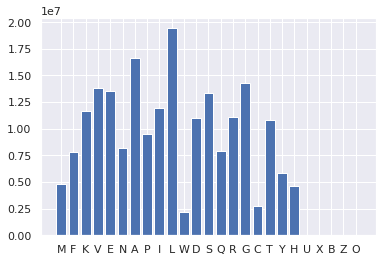

In [6]:
unique_aminos=list(count_aminos.keys())

print('Unique aminos ({}):\n{}'.format(len(unique_aminos), unique_aminos))
x=[i for i in range(len(unique_aminos))]
plt.bar(x, count_aminos.values())
plt.xticks(x, unique_aminos)
plt.show()

There are 25 unique amino acids. The first 20 are the 20 known amino acids which appear from only 2.5 million times such as Tryptophan(W) and Cysteine(C) to around 20 million times such as Alanine(A) and Leucine(L).

Interestingly, the last 5 amino acids: U, X, B, Z and O which appear 

In [7]:
print(list(count_aminos.values())[-5:])

[327, 8273, 276, 248, 28]


They describe respectively:

U:

X: any amino acid

B: Asparagine/Aspartic Acid

Z: Glutamine/Glutamic Acid

O: 

As far as concerns the sequences

In [8]:
print('Average length:', np.mean(length_seqs))
print('Deviation:', np.std(length_seqs))
print('Min length:', np.min(length_seqs))
print('Max length:', np.max(length_seqs))

Average length: 359.37506918185096
Deviation: 333.39939306284276
Min length: 2
Max length: 35213


In [23]:
sorted_seqs=np.array(length_seqs)
sorted_seqs.sort()
print('10 shortest:\n{}\n10 longest:\n{}'.format(sorted_seqs[:10], sorted_seqs[-10:]))
print('Number sequences less than 30 AA:', len(sorted_seqs[sorted_seqs<30]))
print('Number sequences more than 500 AA:', len(sorted_seqs[sorted_seqs>500]))
print('Number sequences less than 1000 AA:', len(sorted_seqs[sorted_seqs>1000]))

10 shortest:
[2 2 3 3 3 3 3 4 4 4]
10 longest:
[10624 10746 11103 11872 13100 14507 18141 18562 34350 35213]
Number sequences less than 30 AA: 5336
Number sequences more than 500 AA: 107859
Number sequences less than 1000 AA: 18144


# GOs analysis

There are 45006 possible labels for each example which is a huge classification problem. However, some Go could not be used by the sequences, so it can be removed. At the same time, some sequence could have some Go that it is not in the GO dictionary meaning that its function is not available from the data that I have

In [14]:
goes_counter={}

for seq_goes in proteins_goes:
    for go in seq_goes:
        if go in goes_counter:
            goes_counter[go] +=1
        else:
            goes_counter[go] = 1
            
mylist=list(goes_counter.values())
print('Number of Gos used by the sequences:', len(mylist))
print('Minimum times go occurs:', np.min(mylist))
print('Maximum times go occurs:', np.max(mylist))
print('Average:', np.mean(mylist))

Number of Gos used by the sequences: 28182
Minimum times go occurs: 1
Maximum times go occurs: 150422
Average: 104.89177489177489


From this first quick analysis, we can see that the not all the 45006 GOs notations are used. More precisely, only 28182 GOs are used which in average they occur in 104 different sequences. 

Let's see how many of these Gos are available in the Go dictionary

In [31]:
go_dict_counter=0
outliners=0
for go_name in goes_counter:
    if go_name in go_dictionary:
        go_dict_counter +=1
    else:
        outliners +=1

print('Available in the GO onology dictionary:', go_dict_counter)
print('NOT available in the GO onology dictionary:', outliners)

Available in the GO onology dictionary: 28128
NOT available in the GO onology dictionary: 54


Not all the GOs used to describe the amino acid sequence's function are defined in the GO ontology dictionary. 

In [33]:
print(sorted(mylist)[-3000:])

[113, 113, 113, 113, 113, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 123, 123, 123, 123, 123, 123, 123, 123,

In [37]:
goes_list=[]

threshold=100
for seq_goes in proteins_goes:
    for go in seq_goes:
        if ((goes_counter[go]>=threshold) and (go not in goes_list)):
            goes_list.append(go)

print('Number of labels:', len(goes_list))

Number of labels: 3344


In [38]:
print(goes_list[:10])

['GO:0005737', 'GO:0002161', 'GO:0005524', 'GO:0004822', 'GO:0000049', 'GO:0008270', 'GO:0006428', 'GO:0004821', 'GO:0006427', 'GO:0005886']


# Conclusion

Now, that I got an idea of the data available, I have to decide which criteria the examples must meet in order to be used.

There are 560118 sequences with a length ranging from 2 to 35k amino acids. Around 5k proteins are below 30 amino acids which is common to be the minimum length required to define an amino acid sequence as protein. Other 18k proteins have a length larger than 1000 amino acids.

The GOs used in the examples are only 28182 compared to the 45006 from the GO ontology dictionary. Moreover, the function of 54 of these GOs is not available in the GO ontology dictionary. The GOs appear from 1 to 150k times in the dataset. 

QUESTIONS:

Which is the minimum and maximum amino acid length threshold.
Should I use alle the 25 amino acids?
Should I use all the 28128 GOs or define a threshold of appearences?


In [39]:
data={}
data['unique_aminos']=unique_aminos
data['min_length_aminos']=0
data['max_length_aminos']=512
data['available_goes']=goes_list

with open('../hyperparams.yaml', 'w') as outfile:
    yaml.dump(data, outfile)